<a href="https://colab.research.google.com/github/mateetshepo/Retail-Project/blob/master/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the libraries
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import matplotlib.pyplot as plt #Data Visualization 
#import seaborn as sns  #Python library for Vidualization

In [0]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from __future__ import division

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#import sys
#reload(sys)
#sys.setdefaultencoding("ISO-8859-1")

In [0]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

In [0]:
#Import the dataset
data = pd.read_csv('Mall_Customers.csv')

In [0]:
df = data.copy()

In [0]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploratory Data Analysis**

In [0]:
df.shape

(200, 5)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Distributions**

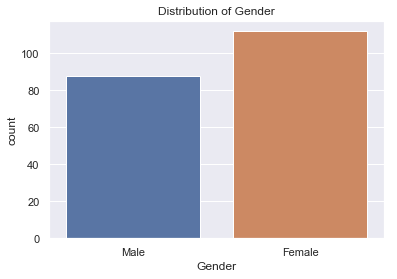

In [0]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

_Greater distribution of females than males._

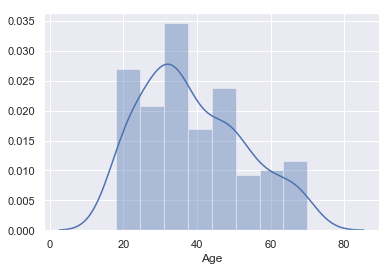

In [0]:
sns.distplot(df['Age'])
#plt.hist(df['Age'])

_Greater distribution of shoppers in their late 30s, followed by 20s._

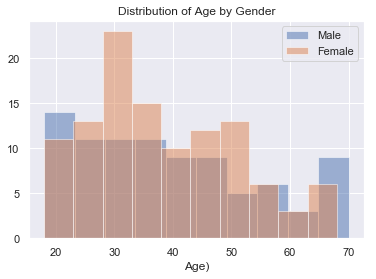

In [0]:
# Histogram of Age by gender
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age)');
plt.legend();

In [0]:
#import plotly.express as px
#tips = px.data.tips()
#fig = px.histogram(df, x="Age", color="Gender")
#fig.show()

In [0]:
#import plotly.graph_objects as go

#import numpy as np

#x0 = df[df['Gender'] == 'Male']
# Add 1 to shift the mean of the Gaussian distribution
#x1 = df[df['Gender'] == 'Female'] 

#fig = go.Figure()
#fig.add_trace(go.Histogram(x=x0))
#fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
#fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
#fig.update_traces(opacity=0.75)
#fig.show()

In [0]:
# _Greater distribution of shoppers in their late 30s, followed by 20s._

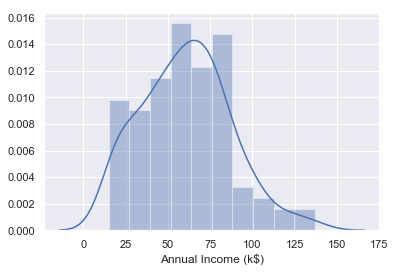

In [0]:
sns.distplot(df['Annual Income (k$)'])

_Greater portion of annual income is between 50k and 80k._

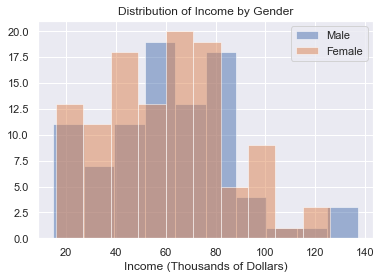

In [0]:
# Histogram of spending score by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

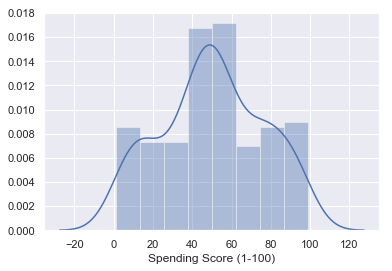

In [0]:
sns.distplot(df['Spending Score (1-100)'])

_Most shoppers have a spending between 40 & 60._

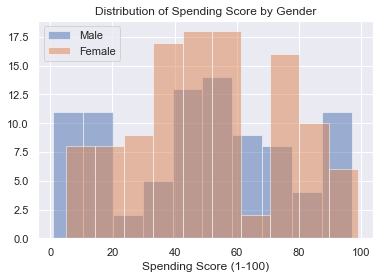

In [0]:
# Histogram of income by gender
plt.hist('Spending Score (1-100)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Spending Score (1-100)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Spending Score by Gender');
plt.xlabel('Spending Score (1-100)');
plt.legend();

In [0]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Correlation**

In [0]:
dfcorr = df.corr()

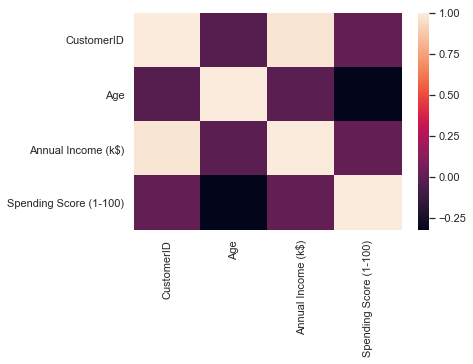

In [0]:
#import seaborn as sns; sns.set()
sns.heatmap(dfcorr)

_Can drop customer ID because customer ID and annual income have strong correlation._

In [0]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Clustering Using K-Means

In [0]:
from sklearn.cluster import KMeans
#wcss=[]

In [0]:
df = pd.get_dummies(df)

### Age and Spending Score

In [0]:
### Feature sleection for the model
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values


In [0]:
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

#algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
#                        tol=0.0001,  random_state= 111  , algorithm='elkan') )

wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)

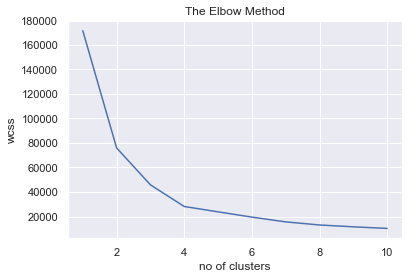

In [0]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
kmeans = (KMeans(n_clusters= 4, init='k-means++', random_state=0))
kmeans.fit(X1)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [0]:
#print(centroids1)

In [0]:
#print(labels1)

In [0]:
#X1[:, 0].min()

In [0]:
#X1[:, 0].max()

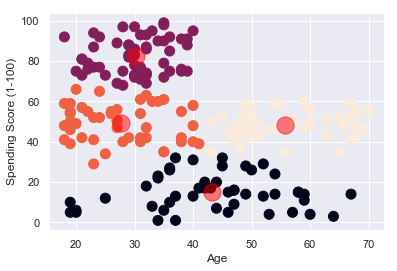

In [0]:
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
             s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Annual Income and Spending Score

In [0]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [0]:
### Feature sleection for the model
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [0]:
wcss2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)

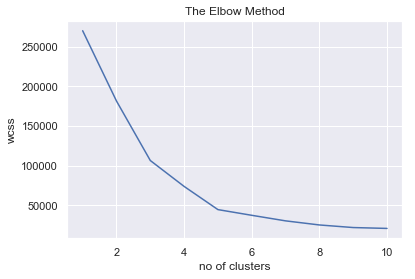

In [0]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
kmeans = (KMeans(n_clusters= 5, init='k-means++', random_state=0))
kmeans.fit(X2)
labels2 = kmeans.labels_
centroids2 = kmeans.cluster_centers_

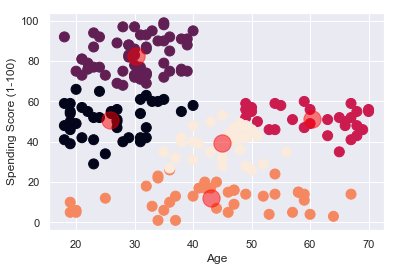

In [0]:
plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
             s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [0]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


### Age, Annual Income and Spending Score

In [0]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

In [0]:
wcss3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X3)
    wcss3.append(kmeans.inertia_)

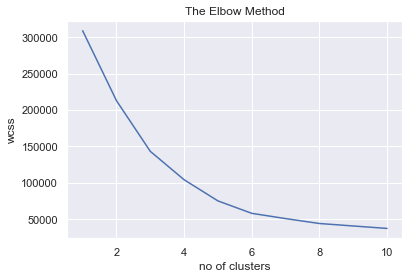

In [0]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss3)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
kmeans = (KMeans(n_clusters= 5, init='k-means++', random_state=0))
kmeans.fit(X3)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

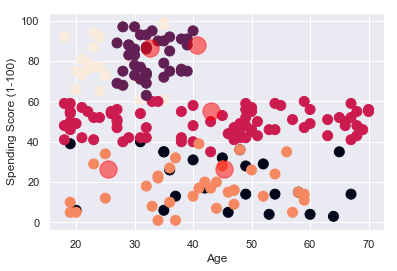

In [0]:
#plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels3 , 
#             s = 100 )
#plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
#plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
#plt.show()